# 1 Author
**Student name**: Sparsh                                        
   **Student id**: 230440319

# 2 Problem formulation

 We need to build a machine learning pipeline using given MlEnd Yummy dataset that takes as an input a photo of a dish that has either rice or chips and predicts whether the picture has rice or chips.

 MLEnd Yummy Dataset has 3250 samples and 12 attributes.

 - FileName(image)
 - Diet
 - Cuisine_org
 - Cuisine
 - Dish_name
 - Home_or_restaurant
 - Ingredients
 - Healthiness_rating
 - Healthiness_rating_int
 - Likeness
 - Likeness_int
 - Benchmark_A



In [3]:
!pip install mlend

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00


Importing necessary Libraries

In [4]:
from google.colab import drive

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

import mlend
from mlend import download_yummy, yummy_load

import os, sys, re, pickle, glob
import urllib.request
import zipfile

import IPython.display as ipd
from tqdm import tqdm
import librosa

drive.mount('/content/drive')

Mounted at /content/drive


# 3 Machine Learning Pipeline

Pipeline Stages:

Step 1: Data Loading or Collection:

-  Pipline start with downloading the data from Mlend yumy dataset and importing all necessary libraries

- Extract data from the csv file and load it to the dataframe.

Step 2: Data preprocessing

- The problem with the dataset was that it is not matching with the expectation of having rice and chips as a seprate column.

- So first I created new column rice_chips within the data frame to determine whether the dish has rice or chips or not.Out of 32500 records  got total 800 rice and 139 chips or fries.

- Due to the fact that chips is only limited to 139 records so i manully downsample the rice column to achive better balance in the data .This will help my machine learning model to not being baised towards Rice records during training.


- I also created two function make_it_square and resize image to make all image of same size



Step 3: Encoding Chips_Rice to 0 and 1

- Maped the rice_chips categorical data to numerical data rice 0 and chips 1 so that it can be used as target variable Y encoded for traing and testing my machine learning model

Step 4 : Splitting Data based on Benchmark_A

- we are provided a seprate column Benchmark_A which has Train and test division.Our goal is to split the data into train and test based on this column.

Step 5 : Data preprocessing

- In this step I created two function make_it_square and resize image to make all image of same size

Step 6 : Feature Extraction

- Extracted  3 different feature from images .Basically this step is used to reduce the dimenstionality of image and will explain more in Feature extraction section.

Step 7 : Model training and prediction

- After nomalising the image we can apply diffrent machine learing algorithm like Svm , Random forest and k nearest neighbor to identinfy the image whether it is rice otr chips.

## 4 Transformation stage

Basic goal of this stage is to reduce the image dimenstionality as while processesing raw image it will be very difficult to process the image with several features in it so we will be extracting three feature here by defining two finction def get_yellow_component and and def GMLC_features.

- The first function get_yellow_component is used to get the amount of yellow colur in the image.basically we will disting images based on yellow colur in it.

- The second function GMLC_features is used to get the texture feature from grayscale image considering the specific distance and angle.

## 5 Modelling

I have used several machine learning model like Linear support vector classifier ,Random forest classifier, Logistic regression,K nearest neighbour for image classification.I have applied these serveral model in order to get variety in models as every model have their own strength and weakness so by analysing all models we can conclude to choose a perfect model .

Perfect Models used in our case is :

- Linear Support vector classifier

-- The Purpose of choosing this model is because it is considedred to be best when there is binary classification and in our model we are choosing whether the image is rice or chips.

-- It does not suffer with model overfitting and performs best in high dimenstion feature space and in our case we are using Images which has large dimention.Also it handle more complex problem


## 6 Methodology

In our case we are given a column named Benchmark_A which is basically a divion of test and train in all recods so i have used this column to split between test and train dataset.

Model performance in our case is assesssed by accuracy and confusion matrix .

- Accuracy is basically no of correct prediction divided by total number of prediction.I calculated accuracy of my all four ml models and found that LinearSvc gives best accuracy in training and testing dataset.

- Confusion matrix give detailed analysis of model's prediction.

It has total 4 component
- True Positive
- True Negative
- False Positive
- False negative

In our case confusion matrix is as follow:

- 47% of the instances that were actually rice were correctly classified as rice (TP).
- 38% of the instances that were actually rice were incorrectly classified as chips (FP).
- 53% of the instances that were actually chips were incorrectly classified as rice (FN).
- 62% of the instances that were actually chips were correctly classified as chips (TN).

Accuracy of our model is (TP + TN) / (TP + TN + FP + FN)=0.58
this basically means it correctly classified 58% of instance

## 7 Dataset

The imput data has raw image and attributes like dish_name,ingredient,Benchmark_A.

Below are the preprocessing and feature extraction step.








In [5]:
dir = download_yummy(save_to='/content/drive/MyDrive/Data/MLEnd')
dir

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!


'/content/drive/MyDrive/Data/MLEnd/yummy'

In [6]:
os.listdir(dir)

['MLEndYD_images', 'MLEndYD_image_attributes_benchmark.csv']

In [7]:
import pandas as pd

dataset_path = "./drive/MyDrive/Data/MLEnd/yummy/MLEndYD_image_attributes_benchmark.csv"



In [125]:
import pandas as pd
import numpy as np

# loaded the dataset into the 'df' DataFrame
df = pd.read_csv(dataset_path)

# Function to filter dishes containing rice or chips and add a 'rice_chips' column
def filter_rice_or_chips(row):
    ingredients = str(row['Ingredients']).lower()
    dish_name = str(row['Dish_name']).lower()

    # Checked if the string contains 'rice' or 'chips' and return the label
    if 'rice' in ingredients or 'rice' in dish_name:
        return 'rice'
    elif 'chips' in ingredients or 'chips' in dish_name:
        if 'chocolate' not in ingredients and 'chocolate' not in dish_name:
            return 'chips'
        else:
            return 'discard'
    elif 'fries' in ingredients or 'fries' in dish_name:
        return 'chips'
    else:
        return 'discard'  # Label to indicate rows to be discarded

# Appied the filter to create a new DataFrame
filtered_df = df.copy()  # Make a copy of the original DataFrame
filtered_df['rice_chips'] = filtered_df.apply(filter_rice_or_chips, axis=1)

# Selected all rows where 'rice_chips' is 'chips'
chips_df = filtered_df[filtered_df['rice_chips'] == 'chips']

# Selected only the first 140 rows where 'rice_chips' is 'rice'
rice_df = filtered_df[filtered_df['rice_chips'] == 'rice'].head(140)

# Concatenated the two DataFrames
combined_df = pd.concat([chips_df, rice_df])

#Randomized the rows in the combined DataFrame

combined_df = combined_df.sample(frac=1, random_state=42)

#  'rice_chips' is the column that is encoded in your DataFrame
rice_chips_column = combined_df['rice_chips']

# Maped 'rice' to 0 and 'chips' to 1
rice_chips_mapping = {'rice': 0, 'chips': 1}
new = combined_df['rice_chips'].map(rice_chips_mapping)

# Created 'Y_encoded' based on the encoding of 'rice_chips'
combined_df['Y_encoded'] = new

Traindf = combined_df[combined_df['Benchmark_A'] == 'Train']
Testdf = combined_df[combined_df['Benchmark_A'] == 'Test']

# Extracted the required columns for TrainSet
TrainSet = {
    'X_paths': Traindf['filename'],  # Assuming 'filename' is the column containing paths
    'Y': np.array(Traindf['rice_chips']).ravel(),  # Flatten 'rice_chips' to a single-dimensional array
    'Y_encoded': np.array(Traindf['Y_encoded'])
}

# Extracted the required columns for TestSet
TestSet = {
    'X_paths': Testdf['filename'],  # Assuming 'filename' is the column containing paths
    'Y': np.array(Testdf['rice_chips']).ravel(),  # Flatten 'rice_chips' to a single-dimensional array
    'Y_encoded': np.array(Testdf['Y_encoded'])
}


In [122]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [123]:

#Counting all rice and chups records

filtered_df['rice_chips'] = filtered_df.apply(filter_rice_or_chips, axis=1)

All_rice= (filtered_df['rice_chips']=='rice').sum()
All_chips = (filtered_df['rice_chips']=='chips').sum()

rice_tr= (Traindf['rice_chips']=='rice').sum()
chips_t= (Traindf['rice_chips']=='chips').sum()

rice_tt= (Testdf['rice_chips']=='rice').sum()
chips_tt= (Testdf['rice_chips']=='chips').sum()

print(All_rice,All_chips )
print(rice_tr, chips_t)
print(rice_tt, chips_tt)

802 139
89 94
51 45


In [124]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [89]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [90]:
TrainSet['Y']

array(['chips', 'chips', 'rice', 'rice', 'rice', 'rice', 'chips', 'rice',
       'rice', 'rice', 'chips', 'rice', 'chips', 'rice', 'chips', 'rice',
       'chips', 'chips', 'chips', 'rice', 'chips', 'chips', 'chips',
       'chips', 'rice', 'rice', 'chips', 'rice', 'chips', 'chips',
       'chips', 'rice', 'chips', 'chips', 'rice', 'rice', 'rice', 'rice',
       'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'chips',
       'chips', 'chips', 'chips', 'rice', 'chips', 'rice', 'rice',
       'chips', 'chips', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice',
       'rice', 'rice', 'chips', 'rice', 'chips', 'chips', 'rice', 'chips',
       'rice', 'chips', 'rice', 'chips', 'chips', 'rice', 'rice', 'chips',
       'chips', 'rice', 'chips', 'chips', 'rice', 'rice', 'rice', 'chips',
       'rice', 'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'rice', 'chips', 'chips', 'rice', 'chips', 'rice',
       'chips', 'rice', 'rice', 'chips', 'chips', 'chips', '

In [91]:
TrainSet['Y_encoded']

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1])

In [92]:
sample_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/*.jpg'
files = glob.glob(sample_path)
len(files)

3250

(-0.5, 4031.5, 3023.5, -0.5)

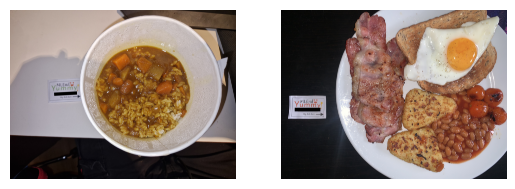

In [93]:
#Visualising images

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000001.jpg')
plt.subplot(1,2,1)
plt.imshow(I)
plt.axis('off')

I = plt.imread('/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/000002.jpg')
plt.subplot(1,2,2)
plt.imshow(I)
plt.axis('off')

In [126]:
TrainSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [127]:
TestSet.keys()

dict_keys(['X_paths', 'Y', 'Y_encoded'])

In [128]:
TrainSet['X_paths']

771     000772.jpg
2896    002897.jpg
216     000217.jpg
20      000021.jpg
448     000449.jpg
           ...    
2837    002838.jpg
506     000507.jpg
433     000434.jpg
2591    002592.jpg
2456    002457.jpg
Name: filename, Length: 183, dtype: object

In [129]:
TestSet['Y']

array(['rice', 'rice', 'rice', 'rice', 'rice', 'rice', 'chips', 'chips',
       'rice', 'rice', 'chips', 'chips', 'rice', 'chips', 'chips', 'rice',
       'chips', 'rice', 'chips', 'chips', 'chips', 'rice', 'rice', 'rice',
       'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'chips', 'rice',
       'chips', 'chips', 'chips', 'chips', 'rice', 'rice', 'chips',
       'rice', 'rice', 'chips', 'chips', 'rice', 'chips', 'chips',
       'chips', 'chips', 'rice', 'chips', 'rice', 'rice', 'rice', 'rice',
       'chips', 'rice', 'rice', 'chips', 'rice', 'rice', 'chips', 'rice',
       'chips', 'rice', 'chips', 'rice', 'rice', 'chips', 'rice', 'chips',
       'chips', 'chips', 'rice', 'rice', 'rice', 'chips', 'chips',
       'chips', 'chips', 'rice', 'rice', 'chips', 'chips', 'rice', 'rice',
       'chips', 'rice', 'rice', 'rice', 'rice', 'rice', 'chips', 'chips',
       'rice', 'chips', 'rice'], dtype=object)

In [95]:
#Setting path of images and Y_incoded values

X_train_paths = TrainSet['X_paths']
X_test_paths  = TestSet['X_paths']

Y_train = TrainSet['Y_encoded']
Y_test  = TestSet['Y_encoded']

Rice


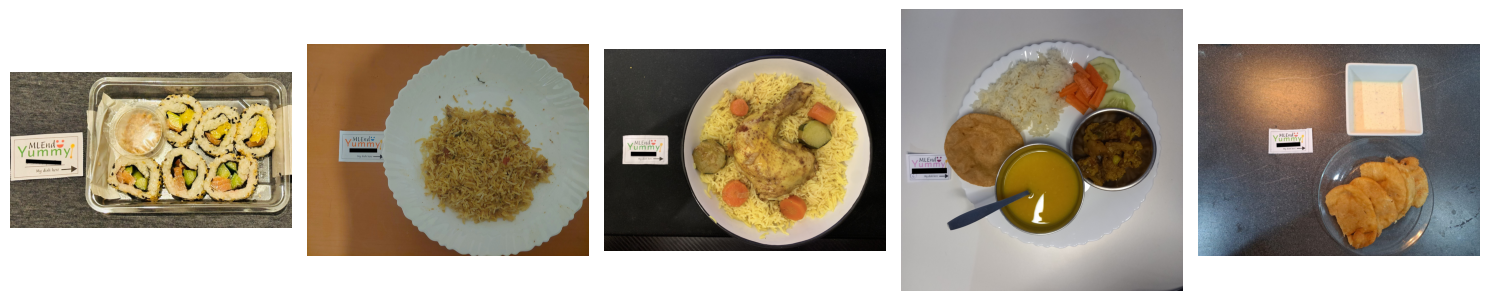

Chips


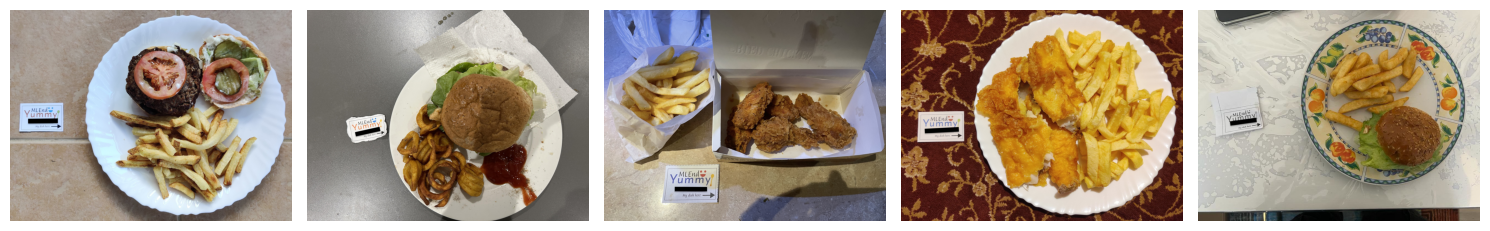

In [96]:
#Given Csv files does not have exact path of image it has only file name so extracting it and setting it to base_path

import os

# Directory path
base_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/'

Rice_Img = np.array(X_train_paths)[Y_train == 0]
Chips_Img = np.array(X_train_paths)[Y_train == 1]

print('Rice')
plt.figure(figsize=(15, 5))
for k, file in enumerate(Rice_Img[:5]):
    try:
        full_path = os.path.join(base_path, file)
        I = plt.imread(full_path)
        plt.subplot(1, 5, k + 1)
        plt.imshow(I)
        plt.axis('off')
    except FileNotFoundError:
        print(f"File not found: {file}")

plt.tight_layout()
plt.show()

print('Chips')
plt.figure(figsize=(15, 5))
for k, file in enumerate(Chips_Img[:5]):
    try:
        full_path = os.path.join(base_path, file)
        I = plt.imread(full_path)
        plt.subplot(1, 5, k + 1)
        plt.imshow(I)
        plt.axis('off')
    except FileNotFoundError:
        print(f"File not found: {file}")

plt.tight_layout()
plt.show()


In [97]:
# Resizing images to get all images of same shape

def make_it_square(I, pad=0):
  N,M,C = I.shape
  if N>M:
    Is = [np.pad(I[:,:,i], [(0,0),(0, N-M)], 'constant', constant_values=pad) for i in range(C)]
  else:
    Is = [np.pad(I[:,:,i], [(0, M-N),(0,0)], 'constant', constant_values=pad) for i in range(C)]

  return np.array(Is).transpose([1,2,0])

def resize_img(I,size=[100,100]):
  N,M,C = I.shape
  Ir = [sp.core.processing.resize(I[:,:,i],size) for i in range(C)]
  return np.array(Ir).transpose([1,2,0])

In [98]:
base_path = '/content/drive/MyDrive/Data/MLEnd/yummy/MLEndYD_images/'

X_train = []
for k, file in enumerate(X_train_paths):
    sp.utils.ProgBar_JL(k, len(X_train_paths), L=50, color='blue')
    try:
        I = plt.imread(os.path.join(base_path, file))
        I = make_it_square(I, pad=0)
        I = resize_img(I, size=[200, 200])
        X_train.append(I)
    except FileNotFoundError:
        print(f"File not found: {file}")

X_test = []
for k, file in enumerate(X_test_paths):
    sp.utils.ProgBar_JL(k, len(X_test_paths), L=50, color='blue')
    try:
        I = plt.imread(os.path.join(base_path, file))
        I = make_it_square(I, pad=0)
        I = resize_img(I, size=[200, 200])
        X_test.append(I)
    except FileNotFoundError:
        print(f"File not found: {file}")

X_train = np.array(X_train)
X_test = np.array(X_test)

# Check the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|183\183|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|96\96|
Done!
X_train shape: (183, 200, 200, 3)
X_test shape: (96, 200, 200, 3)


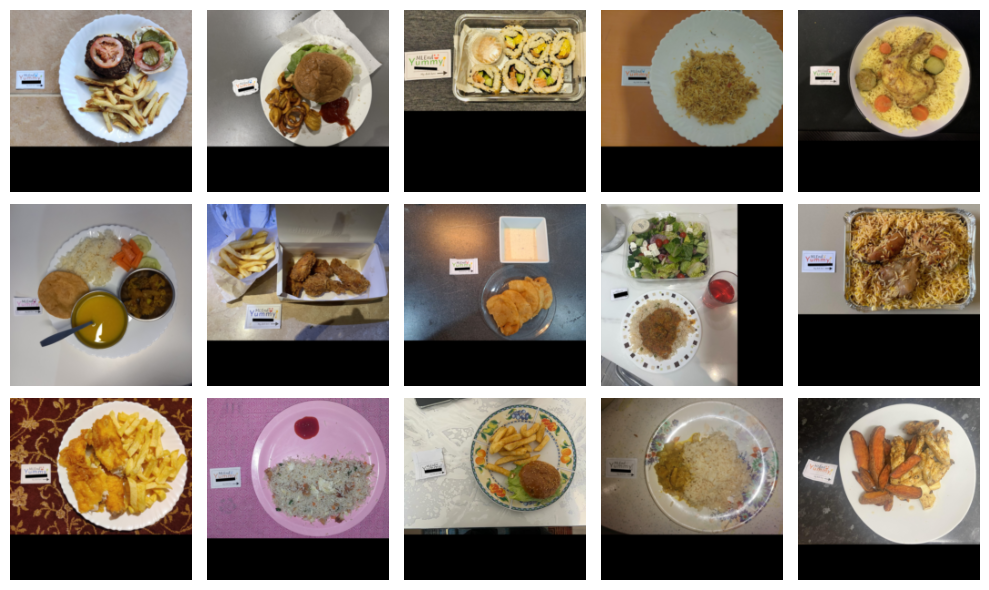

In [99]:
plt.figure(figsize=(10,6))
for k,I in enumerate(X_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

In [100]:
# In this step we are extracting three image feature by defing function like  get_yellow_component and GMLC_features(I)
# Also defining function for confusion matrix
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops


def get_yellow_component(I,t1=27, t2=33):
  Ihsv = (rgb2hsv(I)*255).astype('uint8')
  mask = (Ihsv[:,:,0]<t2)*(Ihsv[:,:,0]>t1)
  Ypx = mask.sum()
  return Ypx

def GMLC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2


def showConfMat(CM, labels = ['Rice', 'Chips']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

In [101]:
X_train_f = []
for k, I in enumerate(X_train):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_train_f.append([f1,f2,f3])

X_test_f = []
for k, I in enumerate(X_test):
  f1 = get_yellow_component(I)
  f2,f3 = GMLC_features(I)
  X_test_f.append([f1,f2,f3])

In [102]:
X_train_f = np.array(X_train_f)
X_test_f = np.array(X_test_f)
X_train_f.shape, X_test_f.shape

print("Yellow Component and GMLC Features - Training Set:", X_train_f.shape)
print("Yellow Component and GMLC Features - Testing Set:", X_test_f.shape)


Yellow Component and GMLC Features - Training Set: (183, 3)
Yellow Component and GMLC Features - Testing Set: (96, 3)


In [103]:
#Below step is performed for normalisation it is needed as we need to standardise the data

MEAN = X_train_f.mean(0)
SD = X_train_f.std(0)

X_train_fn = (X_train_f - MEAN)/SD
X_test_fn = (X_test_f - MEAN)/SD

## Result

- Overview of Experiment

Experiment involve training and testing of 4 machine learning model LinearSvc,Random forest,logistic regression and K nearest neighbour .

Used Accuracy and confusion matrix for Evaluating the result.


Results are :
* 		Linear Support Vector Classifier (LinearSVC):
    * Training Accuracy: 0.634
    * Test Accuracy: 0.542
    * The LinearSVC model demonstrated moderate performance on both training and test sets.
* 		Random Forest Classifier:
    * Training Accuracy: 0.667
    * Test Accuracy: 0.510
    * The Random Forest model achieved slightly lower accuracy compared to LinearSVC.
* 		Logistic Regression:
    * Training Accuracy: 0.634
    * Test Accuracy: 0.542
    * Similar to LinearSVC, Logistic Regression showed comparable performance.
* 		k-Nearest Neighbors (KNN):
    * Training Accuracy: 0.727
    * Test Accuracy: 0.500
    * KNN, with k=3, demonstrated higher training accuracy but lower test accuracy.


In [119]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=1)
model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('LinearSVC Training Accuracy:\t',train_accuracy)
print('LinearSVC Test  Accuracy:\t',test_accuracy)

LinearSVC Training Accuracy:	 0.6338797814207651
LinearSVC Test  Accuracy:	 0.5416666666666666


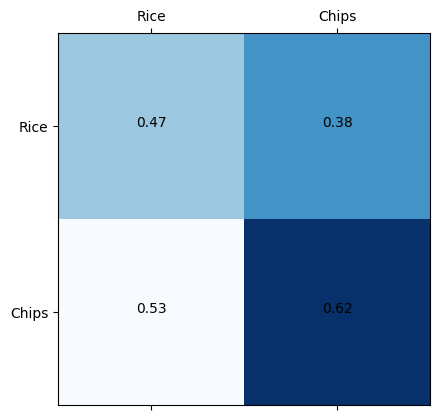

In [130]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [133]:
from sklearn.ensemble import RandomForestClassifier

model =RandomForestClassifier(n_estimators=5,max_depth=3)
model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp==Y_train)
test_accuracy  = np.mean(ysp==Y_test)

print('RandomForestClassifier Training Accuracy:\t',train_accuracy)
print('RandomForestClassifier Test  Accuracy:\t',test_accuracy)

RandomForestClassifier Training Accuracy:	 0.639344262295082
RandomForestClassifier Test  Accuracy:	 0.4791666666666667


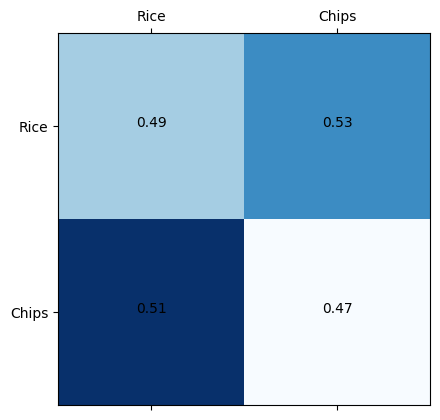

In [134]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [136]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression()

logistic_model.fit(X_train_fn, Y_train)

ytp_logistic = logistic_model.predict(X_train_fn)
ysp_logistic = logistic_model.predict(X_test_fn)

train_accuracy_logistic = np.mean(ytp_logistic == Y_train)
test_accuracy_logistic = np.mean(ysp_logistic == Y_test)

print('Logistic Regression Training Accuracy:', train_accuracy_logistic)
print('Logistic Regression Test Accuracy:', test_accuracy_logistic)


Logistic Regression Training Accuracy: 0.6338797814207651
Logistic Regression Test Accuracy: 0.5416666666666666


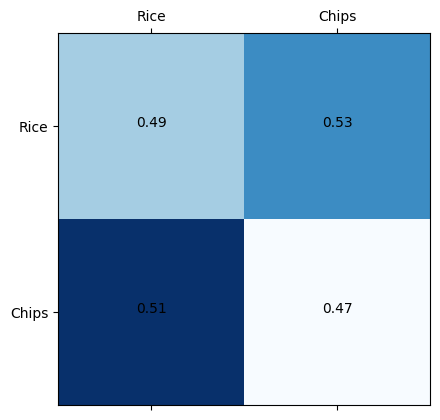

In [137]:

Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

In [138]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train_fn, Y_train)

ytp = model.predict(X_train_fn)
ysp = model.predict(X_test_fn)

train_accuracy = np.mean(ytp == Y_train)
test_accuracy = np.mean(ysp == Y_test)

print('KNeighborsClassifier Training Accuracy:\t', train_accuracy)
print('KNeighborsClassifier Test Accuracy:\t\t', test_accuracy)


KNeighborsClassifier Training Accuracy:	 0.726775956284153
KNeighborsClassifier Test Accuracy:		 0.5


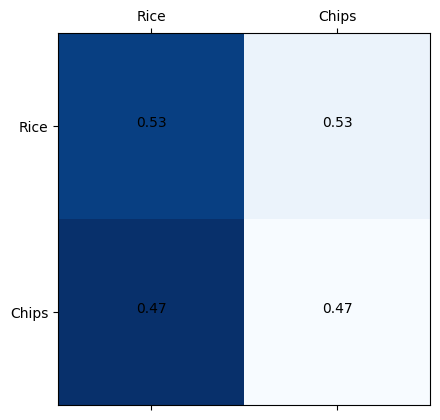

In [139]:
Ac = np.mean(ysp[Y_test.astype(int)==0]==0)
Ar = np.mean(ysp[Y_test.astype(int)==1]==1)

Mc = np.mean(ysp[Y_test.astype(int)==0]==1)
Mr = np.mean(ysp[Y_test.astype(int)==1]==0)

CM = np.array([[Ac, Mc],[Mr, Ar]])

showConfMat(CM)

## 9 Conclusion

Key conclusion after applying above machine learning model are:

-    LinearSvc and Logistic regression shows same result which  shows that linear model is well suited for binary classification (Rice,Chips).
-  Random forest did not standout on linear model shows less accuracy on testing data
-    K nearest neighbour has higher training accuracy but lower test accuracy which can be a case of overfitting

Improvements

- We can add other feature like Convolutional Neural Network (CNN) Features,HOG (Histogram of Oriented Gradients),Local Binary Patterns (LBP) related to image to get more accuarte result.
- I have tried adding some feature like histogram but it didn't suited well so i removed it from my solution
- We can also use hyperparamenter tuning to search optimal hyperparameter for each model

Future work

- We can use Deep learning architecture like convolution nueral network for image classification






